# Predictive Machine Learning with Interpretability

## Author Chiamaka Ikeh

### Imports and Initial Setup

In [2]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced plotting
import shap  # For SHAP values and interpretability
from collections import Counter  # For counting elements in collections
from imblearn.over_sampling import SMOTE  # For handling class imbalance
from sklearn.model_selection import train_test_split, GridSearchCV  # For model selection and hyperparameter tuning
from sklearn.preprocessing import LabelEncoder, StandardScaler, KBinsDiscretizer  # For data preprocessing
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from xgboost import XGBClassifier  # XGBoost model
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report  # For model evaluation


In [4]:
# Load dataset
bank_data_df = pd.read_csv('bank-full.csv', sep=";") # Path to the dataset
bank_data_df.head() # Reading the dataset with ';' separator

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:

# Check for unique values in specified columns
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']:
  print(f"Unique values for {col}: {bank_data_df[col].unique()}")


Unique values for job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values for marital: ['married' 'single' 'divorced']
Unique values for education: ['tertiary' 'secondary' 'unknown' 'primary']
Unique values for default: ['no' 'yes']
Unique values for housing: ['yes' 'no']
Unique values for loan: ['no' 'yes']
Unique values for contact: ['unknown' 'cellular' 'telephone']
Unique values for month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values for poutcome: ['unknown' 'failure' 'other' 'success']
Unique values for y: ['no' 'yes']


In [7]:
bank_data_feature_df = pd.DataFrame

In [8]:
bank_data_feature_df = bank_data_df.copy()
bank_data_feature_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
# Create mappings for encoding categorical features
job_mapping = {'management': 1, 'technician': 2, 'entrepreneur': 3, 'blue-collar': 4, 'unknown': 5,
 'retired': 6, 'admin.': 7, 'services': 8, 'self-employed': 9, 'unemployed': 10, 'housemaid': 11,
 'student': 12,}
marital_mapping = {'married': 2, 'single': 1, 'divorced': 3}
education_mapping = {'tertiary': 1, 'secondary': 2, 'unknown': 0, 'primary': 3}
default_mapping = {'no': 0, 'yes': 1}
housing_mapping = {'yes': 1, 'no': 0}
loan_mapping = {'no': 0, 'yes': 1}
contact_mapping = {'unknown': 0, 'cellular': 1, 'telephone': 2}
month_mapping = {'jan': 1, 'feb': 1, 'mar': 2, 'apr': 2, 'may': 2, 'jun': 3, 'jul': 3, 'aug': 3, 'sep': 4 , 'oct': 4, 'nov': 4, 'dec': 1} # based on weather seasons
poutcome_mapping = {'unknown': 0, 'failure': 1, 'other': 3, 'success': 2}
y_mapping = {'no': 0, 'yes': 1}


# Apply the mappings to the DataFrame
bank_data_feature_df['job'] = bank_data_feature_df['job'].map(job_mapping)
bank_data_feature_df['marital'] = bank_data_feature_df['marital'].map(marital_mapping)
bank_data_feature_df['education'] = bank_data_feature_df['education'].map(education_mapping)
bank_data_feature_df['default'] = bank_data_feature_df['default'].map(default_mapping)
bank_data_feature_df['housing'] = bank_data_feature_df['housing'].map(housing_mapping)
bank_data_feature_df['loan'] = bank_data_feature_df['loan'].map(loan_mapping)
bank_data_feature_df['contact'] = bank_data_feature_df['contact'].map(contact_mapping)
bank_data_feature_df['month'] = bank_data_feature_df['month'].map(month_mapping)
bank_data_feature_df['poutcome'] = bank_data_feature_df['poutcome'].map(poutcome_mapping)
bank_data_feature_df['y'] = bank_data_feature_df['y'].map(y_mapping)

# Now 'bank_data_feature_df' contains the encoded features.
bank_data_feature_df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,2,1,0,2143,1,0,0,5,2,261,1,-1,0,0,0
1,44,2,1,2,0,29,1,0,0,5,2,151,1,-1,0,0,0
2,33,3,2,2,0,2,1,1,0,5,2,76,1,-1,0,0,0
3,47,4,2,0,0,1506,1,0,0,5,2,92,1,-1,0,0,0
4,33,5,1,0,0,1,0,0,0,5,2,198,1,-1,0,0,0


In [11]:

max_balance = bank_data_feature_df['balance'].max()
print(f"The highest value in the 'balance' column is: {max_balance}")


The highest value in the 'balance' column is: 102127


In [12]:
# Define age group bins and labels
age_bins = [0, 18, 35, 50, 65, 100, float('inf')]
age_labels = ['1', '2', '3', '4', '5', '6']

# Define balance bins and labels based on financial categories
balance_bins = [-float('inf'), -8000, 0, 5000, 20000, 100000, float('inf')]
balance_labels = ['0', '1', '2', '3', '4', '5']


# Create the new columns using pd.cut
bank_data_feature_df['Age_Group'] = pd.cut(bank_data_feature_df['age'], bins=age_bins, labels=age_labels, right=False)
bank_data_feature_df['Balance_Category'] = pd.cut(bank_data_feature_df['balance'], bins=balance_bins, labels=balance_labels, right=False)

# Display the updated DataFrame
bank_data_feature_df.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Age_Group,Balance_Category
0,58,1,2,1,0,2143,1,0,0,5,2,261,1,-1,0,0,0,4,2
1,44,2,1,2,0,29,1,0,0,5,2,151,1,-1,0,0,0,3,2
2,33,3,2,2,0,2,1,1,0,5,2,76,1,-1,0,0,0,2,2
3,47,4,2,0,0,1506,1,0,0,5,2,92,1,-1,0,0,0,3,2
4,33,5,1,0,0,1,0,0,0,5,2,198,1,-1,0,0,0,2,2


In [13]:
bank_data_feature_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'Age_Group', 'Balance_Category'],
      dtype='object')

In [14]:
# Feature Engineering
# Creating new features
# Customer Longevity
bank_data_feature_df['prev_contact'] = bank_data_feature_df['pdays'].apply(lambda x: 1 if x != -1 else 0)

# Contact Duration Efficiency
bank_data_feature_df['short_call'] = bank_data_feature_df['duration'].apply(lambda x: 1 if x < 120 else 0)

# Campaign Intensity
bank_data_feature_df['high_campaign'] = bank_data_feature_df['campaign'].apply(lambda x: 1 if x > 3 else 0)


bank_data_feature_df


,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,Age_Group,Balance_Category,prev_contact,short_call,high_campaign
0,58,1,2,1,0,2143,1,0,0,5,...,1,-1,0,0,0,4,2,0,0,0
1,44,2,1,2,0,29,1,0,0,5,...,1,-1,0,0,0,3,2,0,0,0
2,33,3,2,2,0,2,1,1,0,5,...,1,-1,0,0,0,2,2,0,1,0
3,47,4,2,0,0,1506,1,0,0,5,...,1,-1,0,0,0,3,2,0,1,0
4,33,5,1,0,0,1,0,0,0,5,...,1,-1,0,0,0,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,2,1,0,825,0,0,1,17,...,3,-1,0,0,1,4,2,0,0,0
45207,71,6,3,3,0,1729,0,0,1,17,...,2,-1,0,0,1,5,2,0,0,0
45208,72,6,2,2,0,5715,0,0,1,17,...,5,184,3,2,1,5,3,1,0,1
45209,57,4,2,2,0,668,0,0,2,17,...,4,-1,0,0,0,4,2,0,0,1


In [15]:
# if poutcome is equal to success
bank_data_feature_df['prev_successful_contact'] = (bank_data_feature_df['previous'] > 0) & (bank_data_feature_df['poutcome'] == '2')

bank_data_feature_df['prev_successful_contact'] = bank_data_feature_df['prev_successful_contact'].astype(int)

In [16]:
bank_data_feature_df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,Age_Group,Balance_Category,prev_contact,short_call,high_campaign,prev_successful_contact
0,58,1,2,1,0,2143,1,0,0,5,...,-1,0,0,0,4,2,0,0,0,0
1,44,2,1,2,0,29,1,0,0,5,...,-1,0,0,0,3,2,0,0,0,0
2,33,3,2,2,0,2,1,1,0,5,...,-1,0,0,0,2,2,0,1,0,0
3,47,4,2,0,0,1506,1,0,0,5,...,-1,0,0,0,3,2,0,1,0,0
4,33,5,1,0,0,1,0,0,0,5,...,-1,0,0,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,2,1,0,825,0,0,1,17,...,-1,0,0,1,4,2,0,0,0,0
45207,71,6,3,3,0,1729,0,0,1,17,...,-1,0,0,1,5,2,0,0,0,0
45208,72,6,2,2,0,5715,0,0,1,17,...,184,3,2,1,5,3,1,0,1,0
45209,57,4,2,2,0,668,0,0,2,17,...,-1,0,0,0,4,2,0,0,1,0


In [16]:

# Check for missing values in the DataFrame
missing_values = bank_data_feature_df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 age                        0
job                        0
marital                    0
education                  0
default                    0
balance                    0
housing                    0
loan                       0
contact                    0
day                        0
month                      0
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome                   0
y                          0
Age_Group                  0
Balance_Category           0
prev_contact               0
short_call                 0
high_campaign              0
prev_successful_contact    0
dtype: int64


In [17]:
bank_data_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      45211 non-null  int64   
 1   job                      45211 non-null  int64   
 2   marital                  45211 non-null  int64   
 3   education                45211 non-null  int64   
 4   default                  45211 non-null  int64   
 5   balance                  45211 non-null  int64   
 6   housing                  45211 non-null  int64   
 7   loan                     45211 non-null  int64   
 8   contact                  45211 non-null  int64   
 9   day                      45211 non-null  int64   
 10  month                    45211 non-null  int64   
 11  duration                 45211 non-null  int64   
 12  campaign                 45211 non-null  int64   
 13  pdays                    45211 non-null  int64   
 14  previo

In [18]:

# Convert 'Age_Group' and 'Balance_Category' to integers
bank_data_feature_df['Age_Group'] = bank_data_feature_df['Age_Group'].astype(int)
bank_data_feature_df['Balance_Category'] = bank_data_feature_df['Balance_Category'].astype(int)

bank_data_feature_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      45211 non-null  int64
 1   job                      45211 non-null  int64
 2   marital                  45211 non-null  int64
 3   education                45211 non-null  int64
 4   default                  45211 non-null  int64
 5   balance                  45211 non-null  int64
 6   housing                  45211 non-null  int64
 7   loan                     45211 non-null  int64
 8   contact                  45211 non-null  int64
 9   day                      45211 non-null  int64
 10  month                    45211 non-null  int64
 11  duration                 45211 non-null  int64
 12  campaign                 45211 non-null  int64
 13  pdays                    45211 non-null  int64
 14  previous                 45211 non-null  int64
 15  po

In [19]:
# Prepare features and target variable for model training
X = bank_data_feature_df.drop(columns=['y', 'poutcome', 'previous', 'campaign', 'duration', 'pdays', 'age', 'balance' ])
y = bank_data_feature_df['y'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Define models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f"\n{name} Model Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.2f}")
    print(classification_report(y_test, y_pred))


    # Additional metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")




Logistic Regression Model Evaluation:
Accuracy: 0.66
ROC-AUC Score: 0.80
              precision    recall  f1-score   support

           0       0.96      0.65      0.77      7985
           1       0.23      0.78      0.35      1058

    accuracy                           0.66      9043
   macro avg       0.59      0.72      0.56      9043
weighted avg       0.87      0.66      0.72      9043

Precision: 0.2278
Recall: 0.7826
F1-score: 0.3529

Decision Tree Model Evaluation:
Accuracy: 0.84
ROC-AUC Score: 0.63
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7985
           1       0.32      0.31      0.32      1058

    accuracy                           0.84      9043
   macro avg       0.61      0.61      0.61      9043
weighted avg       0.84      0.84      0.84      9043

Precision: 0.3193
Recall: 0.3147
F1-score: 0.3170

Random Forest Model Evaluation:
Accuracy: 0.86
ROC-AUC Score: 0.80
              precision    recall  f

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:11:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model Evaluation:
Accuracy: 0.89
ROC-AUC Score: 0.83
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7985
           1       0.54      0.37      0.44      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.66      0.69      9043
weighted avg       0.88      0.89      0.88      9043

Precision: 0.5371
Recall: 0.3696
F1-score: 0.4378


In [25]:
# Feature importance for the best model
best_model = models['XGBoost']
feature_importance = best_model.feature_importances_

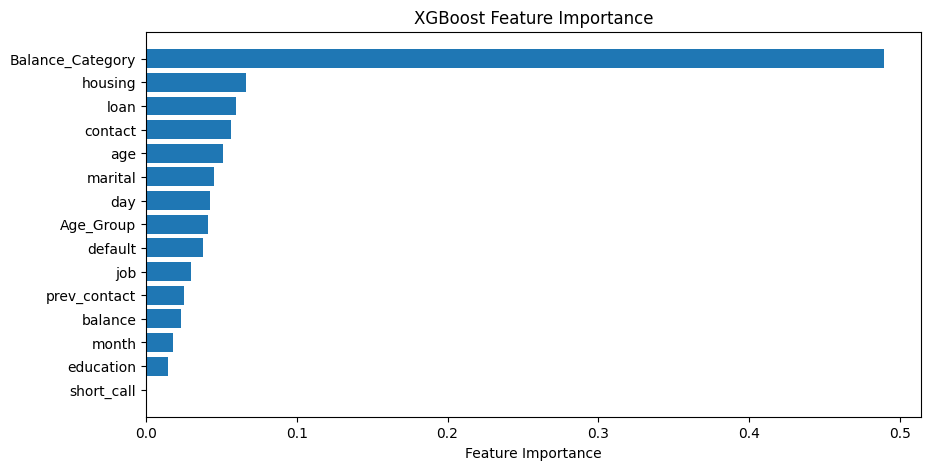

In [26]:
# Plot feature importance
sorted_idx = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [31]:
# SHAP values for model interpretation
print("SHAP Values Shape:", shap_values.shape)  # Print shape of SHAP values
print("Feature Data Shape:", X_train.shape)  # Print shape of feature data

SHAP Values Shape: (63874, 15)
Feature Data Shape: (36168, 17)


100%|===================| 36051/36168 [04:09<00:00]       

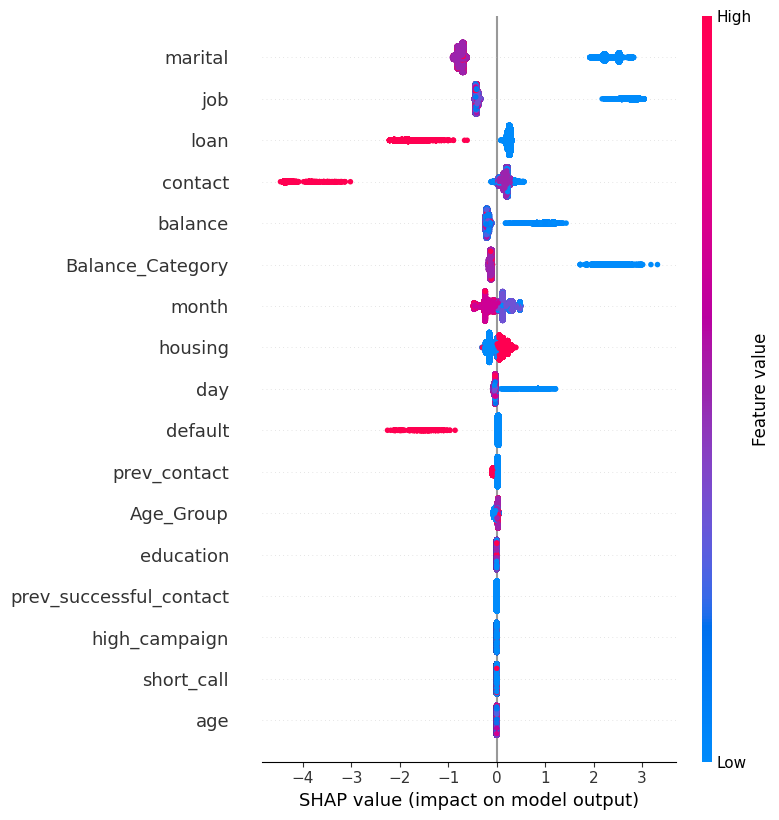

In [33]:
explainer = shap.Explainer(best_model, X_train)  # Initialize SHAP explainer
shap_values = explainer(X_train)  # Calculate SHAP values
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)  # Create summary plot for SHAP values



In [36]:
print("SHAP Values Shape:", shap_values.shape)  # Print shape of SHAP values
print("Feature Data Shape:", X_train.shape)  # Print shape of feature data


SHAP Values Shape: (36168, 17)
Feature Data Shape: (36168, 17)
